train_labels.csv loaded successfully.
First 5 rows of original train_df:
           image_id  label
0  img_ed005410.jpg      1
1  img_0c5ecd2a.jpg      1
2  img_ed713bb5.jpg      1
3  img_12c58874.jpg      1
4  img_eff357af.jpg      1

Checking soil image filepaths:
Found 0 missing files out of 1222 soil images


Final shape of train_df: (1222, 3)

test_ids.csv loaded successfully.
First 5 rows of test_ids_df:
                               image_id
0  6595f1266325552489c7d1635fafb88f.jpg
1  4b614841803d5448b59e2c6ca74ea664.jpg
2  ca30e008692a50638b43d944f46245c8.jpg
3  6a9046a219425f7599729be627df1c1a.jpg
4  97c1e0276d2d5c2f88dddbc87357611e.jpg

Checking test image filepaths:
Found 0 missing files out of 967 test images

--- Enhanced Class Analysis ---

Class distribution:
label
1    1222
Name: count, dtype: int64


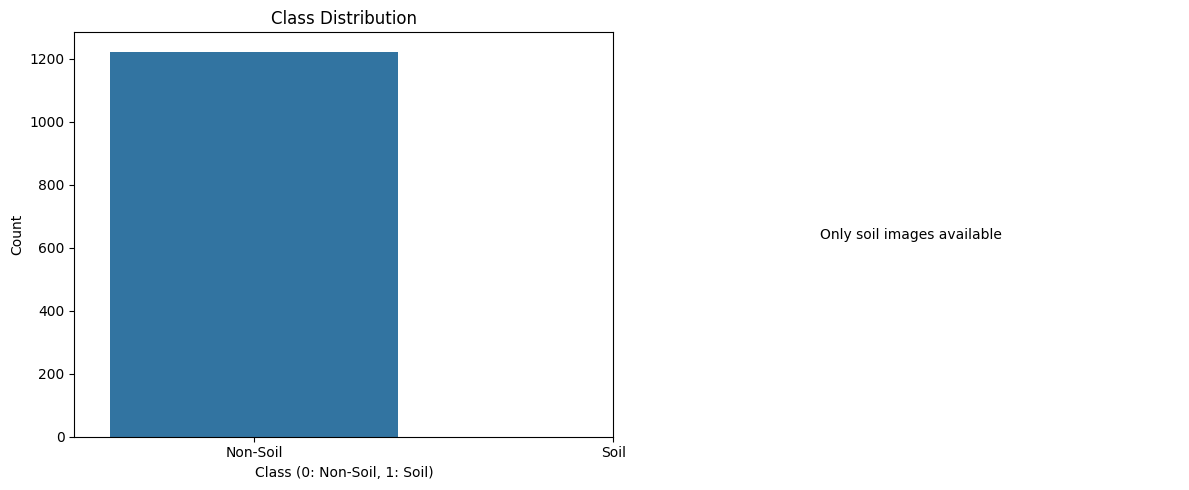


CRITICAL WARNING: Only one class present!
Binary classification requires both soil and non-soil images.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Define the base directory for your project
base_dir = '/kaggle/input/soil-classification-part-2/soil_competition-2025'
train_dir = os.path.join(base_dir, 'train/')
test_dir = os.path.join(base_dir, 'test/')
train_csv_path = os.path.join(base_dir, 'train_labels.csv')
test_ids_csv_path = os.path.join(base_dir, 'test_ids.csv')

# --- Load CSV files ---
try:
    # Load original training data
    train_df = pd.read_csv(train_csv_path)
    print("train_labels.csv loaded successfully.")
    
    # Convert all soil types to 1 (soil)
    train_df['label'] = 1
    print("First 5 rows of original train_df:")
    print(train_df.head())
    
    # Create full filepaths for training images
    train_df['filepath'] = train_df['image_id'].apply(lambda x: os.path.join(train_dir, x))

    # Check if filepaths exist
    print("\nChecking soil image filepaths:")
    missing_count = 0
    for i in range(len(train_df)):
        if not os.path.exists(train_df['filepath'].iloc[i]):
            missing_count += 1
    print(f"Found {missing_count} missing files out of {len(train_df)} soil images")

    # --- Add non-soil images ---
    non_soil_dir = os.path.join(base_dir, 'non_soil/')
    if os.path.exists(non_soil_dir):
        non_soil_files = [f for f in os.listdir(non_soil_dir) if f.endswith(('.jpg', '.png'))]
        non_soil_df = pd.DataFrame({
            'image_id': non_soil_files,
            'label': 0,
            'filepath': [os.path.join(non_soil_dir, f) for f in non_soil_files]
        })
        
        # Combine with original soil data
        train_df = pd.concat([train_df, non_soil_df], ignore_index=True)
        print(f"\nAdded {len(non_soil_df)} non-soil images")
    else:
        print("\nWARNING: 'non_soil' directory not found. Only soil images available.")
        
    print(f"\nFinal shape of train_df: {train_df.shape}")

except FileNotFoundError as e:
    print(f"Error loading train_labels.csv: {e}")
    train_df = None

try:
    test_ids_df = pd.read_csv(test_ids_csv_path)
    print("\ntest_ids.csv loaded successfully.")
    print("First 5 rows of test_ids_df:")
    print(test_ids_df.head())

    # Create full filepaths for test images
    test_ids_df['filepath'] = test_ids_df['image_id'].apply(lambda x: os.path.join(test_dir, x))

    print("\nChecking test image filepaths:")
    missing_count = 0
    for i in range(len(test_ids_df)):
        if not os.path.exists(test_ids_df['filepath'].iloc[i]):
            missing_count += 1
    print(f"Found {missing_count} missing files out of {len(test_ids_df)} test images")

except FileNotFoundError as e:
    print(f"\nError loading test_ids.csv: {e}")
    test_ids_df = None

# --- Enhanced EDA for Binary Classification ---
if train_df is not None:
    print("\n--- Enhanced Class Analysis ---")
    
    # Class distribution
    class_counts = train_df['label'].value_counts()
    print("\nClass distribution:")
    print(class_counts)
    
    # Plotting
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(data=train_df, x='label')
    plt.title('Class Distribution')
    plt.xlabel('Class (0: Non-Soil, 1: Soil)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Soil', 'Soil'])
    
    # Sample images visualization
    plt.subplot(1, 2, 2)
    if len(class_counts) > 1:
        try:
            sample_soil = train_df[train_df['label'] == 1].sample(1)['filepath'].values[0]
            sample_non_soil = train_df[train_df['label'] == 0].sample(1)['filepath'].values[0]
            
            soil_img = Image.open(sample_soil)
            non_soil_img = Image.open(sample_non_soil)
            
            plt.imshow(np.hstack([soil_img, non_soil_img]))
            plt.title('Sample: Soil (left) vs Non-Soil (right)')
            plt.axis('off')
        except Exception as e:
            plt.text(0.5, 0.5, 'Could not display sample images', 
                    ha='center', va='center')
            plt.axis('off')
    else:
        plt.text(0.5, 0.5, 'Only soil images available', 
                ha='center', va='center')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Dataset balance warning
    if len(class_counts) < 2:
        print("\nCRITICAL WARNING: Only one class present!")
        print("Binary classification requires both soil and non-soil images.")
    elif abs(class_counts[0] - class_counts[1]) > 0.3 * len(train_df):
        print("\nWARNING: Significant class imbalance detected")

else:
    print("\nSkipping EDA as train_df could not be loaded.")

train_labels.csv loaded successfully.
First 5 rows of train_df:
           image_id  label  soil_type
0  img_ed005410.jpg      1          1
1  img_0c5ecd2a.jpg      1          1
2  img_ed713bb5.jpg      1          1
3  img_12c58874.jpg      1          1
4  img_eff357af.jpg      1          1

Shape of train_df: (1222, 3)

Sample filepaths from train_df:
/kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_ed005410.jpg
File /kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_ed005410.jpg exists.
/kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_0c5ecd2a.jpg
File /kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_0c5ecd2a.jpg exists.
/kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_ed713bb5.jpg
File /kaggle/input/soil-classification-part-2/soil_competition-2025/train/img_ed713bb5.jpg exists.

test_ids.csv loaded successfully.
First 5 rows of test_ids_df:
                          

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


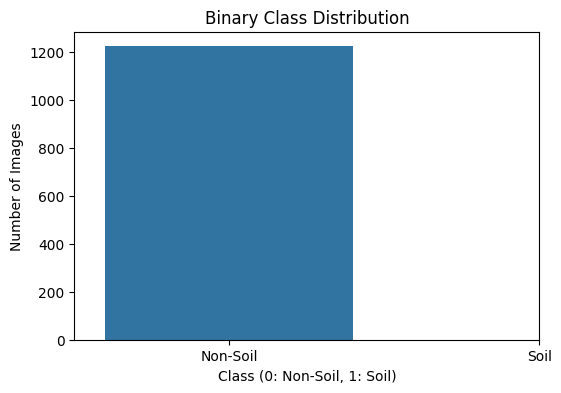


For proper binary classification, you need both soil and non-soil images.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define the base directory for your project
base_dir = '/kaggle/input/soil-classification-part-2/soil_competition-2025'
train_dir = os.path.join(base_dir, 'train/')
test_dir = os.path.join(base_dir, 'test/')
train_csv_path = os.path.join(base_dir, 'train_labels.csv')
test_ids_csv_path = os.path.join(base_dir, 'test_ids.csv') # Assuming this is the name

# --- Load CSV files ---
try:
    train_df = pd.read_csv(train_csv_path)
    print("train_labels.csv loaded successfully.")
    # Convert all soil types to 1 
    train_df['soil_type'] = 1
    print("First 5 rows of train_df:")
    print(train_df.head())
    print(f"\nShape of train_df: {train_df.shape}")

    # Create full filepaths for training images
    train_df['filepath'] = train_df['image_id'].apply(lambda x: os.path.join(train_dir, x))

    # Check if filepaths are correctly formed by checking a few
    print("\nSample filepaths from train_df:")
    for i in range(min(3, len(train_df))): # Print first 3 or fewer if less than 3 rows
        print(train_df['filepath'].iloc[i])
        # Verify if the file actually exists
        if os.path.exists(train_df['filepath'].iloc[i]):
            print(f"File {train_df['filepath'].iloc[i]} exists.")
        else:
            print(f"File {train_df['filepath'].iloc[i]} DOES NOT EXIST. Please check path and uploads.")


except FileNotFoundError as e:
    print(f"Error loading train_labels.csv: {e}")
    print("Please ensure 'train_labels.csv' is in the correct directory:", base_dir)
    train_df = None # Set to None if loading failed

try:
    test_ids_df = pd.read_csv(test_ids_csv_path)
    print("\ntest_ids.csv loaded successfully.")
    print("First 5 rows of test_ids_df:")
    print(test_ids_df.head())
    print(f"\nShape of test_ids_df: {test_ids_df.shape}")

    # Create full filepaths for test images
    test_ids_df['filepath'] = test_ids_df['image_id'].apply(lambda x: os.path.join(test_dir, x))

    print("\nSample filepaths from test_ids_df:")
    for i in range(min(3, len(test_ids_df))):
        print(test_ids_df['filepath'].iloc[i])
        if os.path.exists(test_ids_df['filepath'].iloc[i]):
            print(f"File {test_ids_df['filepath'].iloc[i]} exists.")
        else:
            print(f"File {test_ids_df['filepath'].iloc[i]} DOES NOT EXIST. Please check path and uploads.")

except FileNotFoundError as e:
    print(f"\nError loading test_ids.csv: {e}")
    print("Please ensure 'test_ids.csv' (or your actual test IDs file name) is in the correct directory:", base_dir)
    test_ids_df = None # Set to None if loading failed

# --- EDA for Binary Classification ---
if train_df is not None:
    print("\n--- Class Distribution in Training Data ---")
    class_counts = train_df['soil_type'].value_counts()
    print(class_counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title('Binary Class Distribution')
    plt.xlabel('Class (0: Non-Soil, 1: Soil)')
    plt.ylabel('Number of Images')
    plt.xticks([0, 1], ['Non-Soil', 'Soil'])
    plt.show()
    
    # Check if you have both classes
    if len(class_counts) < 2:
        print("\nWARNING: You only have one class in your dataset!")
        print("For proper binary classification, you need both soil and non-soil images.")
else:
    print("\nSkipping EDA as train_df could not be loaded.")


--- EDA: Image Dimensions and Visualizing Samples ---

Checking dimensions of a few random training images:
Image: img_f45ae7e9.jpg, Dimensions: (1160, 522) (Width, Height), Mode: RGB
Image: img_09ce57b8.jpg, Dimensions: (275, 183) (Width, Height), Mode: RGB
Image: img_726662f1.jpg, Dimensions: (240, 160) (Width, Height), Mode: RGB
Image: img_0670e957.jpg, Dimensions: (100, 100) (Width, Height), Mode: RGB
Image: img_92d7778b.jpg, Dimensions: (1160, 522) (Width, Height), Mode: RGB

Displaying one sample image from each soil category:


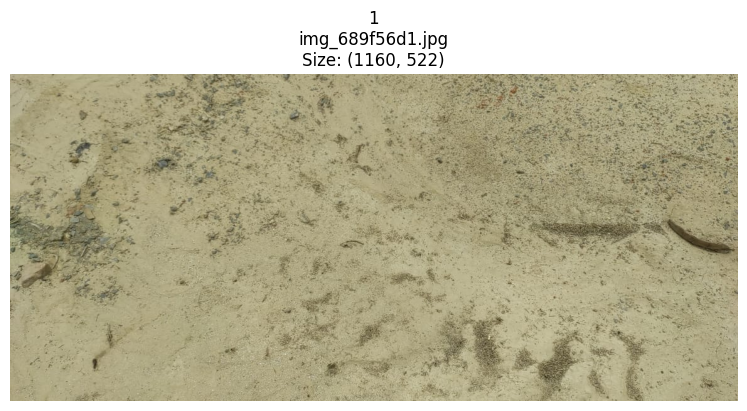

In [3]:
import random

# --- EDA: Image Dimensions and Visualizing Samples ---
if train_df is not None:
    print("\n--- EDA: Image Dimensions and Visualizing Samples ---")

    # Check dimensions of a few random training images
    print("\nChecking dimensions of a few random training images:")
    if not train_df.empty:
        sample_image_paths = random.sample(list(train_df['filepath']), min(5, len(train_df)))
        for img_path in sample_image_paths:
            try:
                with Image.open(img_path) as img:
                    print(f"Image: {os.path.basename(img_path)}, Dimensions: {img.size} (Width, Height), Mode: {img.mode}")
            except FileNotFoundError:
                print(f"Error: Image file not found at {img_path}")
            except Exception as e:
                print(f"Error opening image {img_path}: {e}")
    else:
        print("train_df is empty. Cannot sample image paths.")

    # Display one sample image from each soil category
    print("\nDisplaying one sample image from each soil category:")
    soil_types = train_df['soil_type'].unique()
    plt.figure(figsize=(15, 10)) # Adjust figure size as needed

    for i, soil_type in enumerate(soil_types):
        # Get one image path for the current soil type
        sample_df = train_df[train_df['soil_type'] == soil_type].sample(1, random_state=42) # random_state for reproducibility
        if not sample_df.empty:
            image_path = sample_df['filepath'].iloc[0]
            try:
                img = Image.open(image_path)
                plt.subplot(2, 2, i + 1) # Assuming 4 classes, creating a 2x2 grid
                plt.imshow(img)
                plt.title(f"{soil_type}\n{os.path.basename(image_path)}\nSize: {img.size}")
                plt.axis('off')
            except FileNotFoundError:
                print(f"Error: Image file not found for {soil_type} at {image_path}")
                plt.subplot(2, 2, i + 1)
                plt.title(f"{soil_type}\nImage not found")
                plt.axis('off')
            except Exception as e:
                print(f"Error opening image for {soil_type} at {image_path}: {e}")
                plt.subplot(2, 2, i + 1)
                plt.title(f"{soil_type}\nError loading image")
                plt.axis('off')
        else:
            print(f"No images found for soil type: {soil_type}")
            plt.subplot(2, 2, i + 1)
            plt.title(f"{soil_type}\nNo images available")
            plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping image dimension EDA and visualization as train_df could not be loaded.")

In [4]:
from sklearn.model_selection import train_test_split

# --- Data Splitting (Train/Validation) ---
if train_df is not None and not train_df.empty:
    print("\n--- Data Splitting (Train/Validation) ---")

    # Define the features (X) and the target (y)
    X = train_df['filepath'] # Filepaths to images
    y = train_df['soil_type']  # Corresponding soil types

    # Perform the split
    # We'll use a 80/20 split, meaning 20% for validation
    # random_state ensures reproducibility of the split
    # stratify=y ensures that the class proportions are maintained in both sets
    try:
        X_train, X_val, y_train, y_val = train_test_split(
            X, y,
            test_size=0.10,     # 20% for validation
            random_state=42,    # For reproducibility
            stratify=y          # Preserve class distribution
        )

        print(f"Original training data shape: {train_df.shape}")
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
        print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

        print("\nClass distribution in original training data:")
        print(train_df['soil_type'].value_counts(normalize=True) * 100)

        print("\nClass distribution in new training set (y_train):")
        print(y_train.value_counts(normalize=True) * 100)

        print("\nClass distribution in validation set (y_val):")
        print(y_val.value_counts(normalize=True) * 100)

        # For convenience later, let's combine X_train and y_train into a DataFrame
        # and X_val and y_val into another DataFrame
        train_split_df = pd.DataFrame({'filepath': X_train, 'soil_type': y_train})
        val_split_df = pd.DataFrame({'filepath': X_val, 'soil_type': y_val})

        print("\nFirst 3 rows of train_split_df:")
        print(train_split_df.head(3))
        print("\nFirst 3 rows of val_split_df:")
        print(val_split_df.head(3))

    except Exception as e:
        print(f"Error during train-test split: {e}")
        train_split_df = None
        val_split_df = None
else:
    print("\nSkipping data splitting as train_df is not available or empty.")


--- Data Splitting (Train/Validation) ---
Original training data shape: (1222, 4)
X_train shape: (1099,), y_train shape: (1099,)
X_val shape: (123,), y_val shape: (123,)

Class distribution in original training data:
soil_type
1    100.0
Name: proportion, dtype: float64

Class distribution in new training set (y_train):
soil_type
1    100.0
Name: proportion, dtype: float64

Class distribution in validation set (y_val):
soil_type
1    100.0
Name: proportion, dtype: float64

First 3 rows of train_split_df:
                                               filepath  soil_type
944   /kaggle/input/soil-classification-part-2/soil_...          1
1159  /kaggle/input/soil-classification-part-2/soil_...          1
790   /kaggle/input/soil-classification-part-2/soil_...          1

First 3 rows of val_split_df:
                                               filepath  soil_type
200   /kaggle/input/soil-classification-part-2/soil_...          1
1051  /kaggle/input/soil-classification-part-2/soil_... 


--- Image Preprocessing and Augmentation Pipeline (PyTorch) ---
Target image size: (224, 224)
Batch size: 32

Number of classes: 1
Label to index mapping: {1: 0}

Creating PyTorch Dataset instances...
PyTorch Dataset instances created successfully.
Training dataset size: 1099
Validation dataset size: 123

Creating PyTorch DataLoaders...
PyTorch DataLoaders created successfully.

Verifying a sample batch from the training DataLoader:
Sample batch images shape: torch.Size([32, 3, 224, 224])
Sample batch labels shape: torch.Size([32])
Sample labels (integer encoded):
tensor([0, 0, 0, 0, 0])


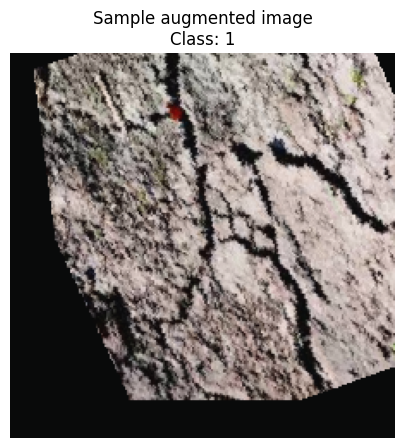

In [5]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd # Should already be imported
import os          # Should already be imported
import matplotlib.pyplot as plt # Should already be imported
import numpy as np

# Ensure train_split_df and val_split_df are available from the previous step
if 'train_split_df' not in globals() or train_split_df is None or \
   'val_split_df' not in globals() or val_split_df is None:
    print("Error: train_split_df or val_split_df not defined. Please run the data splitting step first.")
else:
    print("\n--- Image Preprocessing and Augmentation Pipeline (PyTorch) ---")

    # Define Image Parameters (same as before conceptually)
    IMG_WIDTH = 224
    IMG_HEIGHT = 224
    BATCH_SIZE = 32

    print(f"Target image size: ({IMG_HEIGHT}, {IMG_WIDTH})")
    print(f"Batch size: {BATCH_SIZE}")

    # Define normalization parameters (standard for ImageNet pre-trained models)
    imagenet_mean = [0.485, 0.456, 0.406]
    imagenet_std = [0.229, 0.224, 0.225]

    # --- Define PyTorch Transforms ---

    # Training Data Transforms: includes augmentation
    train_transforms = transforms.Compose([
        transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
        transforms.RandomRotation(30),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(p=0.1), # Added a small chance of vertical flip
        transforms.RandomAffine(degrees=0, translate=(0.15, 0.15), shear=10, fill=Image.NEAREST), # Approximation of shifts and shear
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # For brightness/contrast changes
        transforms.ToTensor(), # Converts PIL Image or numpy.ndarray to tensor and scales to [0,1]
        transforms.Normalize(mean=imagenet_mean, std=imagenet_std) # Normalize with ImageNet stats
    ])

    # Validation/Test Data Transforms: only resizing, ToTensor, and normalization
    val_transforms = transforms.Compose([
        transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
        transforms.ToTensor(),
        transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
    ])

    # --- Create a mapping for string labels to integer indices ---
    # Get unique sorted class names to ensure consistent mapping
    class_names = sorted(train_split_df['soil_type'].unique())
    label_to_idx = {name: idx for idx, name in enumerate(class_names)}
    idx_to_label = {idx: name for name, idx in label_to_idx.items()}
    num_classes = len(class_names)

    print(f"\nNumber of classes: {num_classes}")
    print("Label to index mapping:", label_to_idx)

    # --- Custom PyTorch Dataset ---
    class SoilDataset(Dataset):
        def __init__(self, dataframe, label_to_idx_map, transform=None):
            self.dataframe = dataframe
            self.transform = transform
            self.label_to_idx_map = label_to_idx_map
            # Convert string labels in dataframe to integer indices
            self.dataframe['label_idx'] = self.dataframe['soil_type'].map(self.label_to_idx_map)

        def __len__(self):
            return len(self.dataframe)

        def __getitem__(self, idx):
            img_path = self.dataframe.iloc[idx]['filepath']
            try:
                image = Image.open(img_path).convert('RGB') # Ensure image is RGB
            except FileNotFoundError:
                print(f"ERROR: Image not found at {img_path}. Please check paths.")
                # Return a placeholder or raise an error. For now, returning None.
                # A better approach for missing data might be to filter it out beforehand.
                return None, None
            except Exception as e:
                print(f"ERROR: Could not read image at {img_path}. Error: {e}")
                return None, None


            label = self.dataframe.iloc[idx]['label_idx'] # Use the pre-mapped integer index

            if self.transform:
                image = self.transform(image)

            return image, torch.tensor(label, dtype=torch.long)


    # --- Create Dataset Instances ---
    print("\nCreating PyTorch Dataset instances...")
    try:
        train_dataset = SoilDataset(train_split_df.copy(), label_to_idx_map=label_to_idx, transform=train_transforms)
        val_dataset = SoilDataset(val_split_df.copy(), label_to_idx_map=label_to_idx, transform=val_transforms)
        print("PyTorch Dataset instances created successfully.")
        print(f"Training dataset size: {len(train_dataset)}")
        print(f"Validation dataset size: {len(val_dataset)}")
    except Exception as e:
        print(f"Error creating Dataset instances: {e}")
        train_dataset = None
        val_dataset = None


    # --- Create DataLoaders ---
    if train_dataset and val_dataset:
        print("\nCreating PyTorch DataLoaders...")
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
        val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
        print("PyTorch DataLoaders created successfully.")

        # --- Verify a batch from the DataLoader (Optional) ---
        print("\nVerifying a sample batch from the training DataLoader:")
        try:
            sample_batch_images, sample_batch_labels = next(iter(train_loader))

            # Handle cases where an image might not have loaded correctly in the batch
            # This check is important if __getitem__ can return None for images
            valid_indices = [i for i, img in enumerate(sample_batch_images) if img is not None]
            if not valid_indices:
                print("Could not retrieve a valid batch, possibly due to image loading errors.")
            else:
                sample_batch_images = sample_batch_images[valid_indices]
                sample_batch_labels = sample_batch_labels[valid_indices]

                if sample_batch_images.nelement() > 0 : # Check if tensor is not empty
                    print(f"Sample batch images shape: {sample_batch_images.shape}") # (BATCH_SIZE, 3, IMG_HEIGHT, IMG_WIDTH)
                    print(f"Sample batch labels shape: {sample_batch_labels.shape}")   # (BATCH_SIZE)
                    print(f"Sample labels (integer encoded):\n{sample_batch_labels[:5]}")

                    # Display the first image from the batch
                    # Need to un-normalize for display
                    img_to_show = sample_batch_images[0].permute(1, 2, 0).cpu().numpy() # CHW to HWC for matplotlib
                    mean = np.array(imagenet_mean)
                    std = np.array(imagenet_std)
                    img_to_show = std * img_to_show + mean # Un-normalize
                    img_to_show = np.clip(img_to_show, 0, 1) # Clip values to [0,1] for valid display

                    plt.figure(figsize=(5,5))
                    plt.imshow(img_to_show)
                    label_idx = sample_batch_labels[0].item()
                    plt.title(f"Sample augmented image\nClass: {idx_to_label[label_idx]}")
                    plt.axis('off')
                    plt.show()
                else:
                    print("Retrieved batch is empty after filtering None images.")

        except StopIteration:
            print("The DataLoader is empty. This might happen if the dataset itself is empty or all images failed to load.")
        except Exception as e:
            print(f"Error verifying sample batch from DataLoader: {e}")
            import traceback
            traceback.print_exc()

In [6]:
import torch
import torch.nn as nn
import torchvision.models as models

# --- Model Architecture (PyTorch - Transfer Learning) ---
print("\n--- Model Architecture (PyTorch - Transfer Learning) ---")

# Determine the number of classes from our mapping
if 'num_classes' not in globals() or num_classes is None:
    if 'label_to_idx' in globals() and label_to_idx:
        num_classes = len(label_to_idx)
        print(f"Number of classes re-derived: {num_classes}")
    else:
        print("Error: num_classes or label_to_idx not found. Please ensure previous steps ran.")
        # Defaulting to 4 if not found, but this should be set correctly.
        num_classes = 4

# Load a pre-trained ResNet50 model
# 'weights=models.ResNet50_Weights.IMAGENET1K_V2' uses the newer, better weights
print("Loading pre-trained ResNet50 model...")
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# --- Freeze all parameters in the pre-trained model ---
# We'll initially train only the new classifier head.
print("Freezing parameters of the pre-trained layers...")
for param in model.parameters():
    param.requires_grad = False

# --- Replace the classifier (fully connected layer) ---
# ResNet50's final fully connected layer is named 'fc'.
# We need to find its input features and replace it with a new one for our number of classes.
num_ftrs = model.fc.in_features
print(f"Number of input features to the original fc layer: {num_ftrs}")

# Create a new classifier head
# A simple linear layer is often a good start.
# You could also add more layers, dropout, etc. e.g., nn.Sequential(...)
model.fc = nn.Linear(num_ftrs, num_classes)

print(f"Replaced fc layer with a new nn.Linear({num_ftrs}, {num_classes})")

# --- Move model to GPU if available ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to device: {device}")

# Print model summary (optional, can be verbose for large models)
# print("\nModel Architecture:")
# print(model)

# Example: Print only the new fully connected layer to verify
print("\nNew classifier head (model.fc):")
print(model.fc)


--- Model Architecture (PyTorch - Transfer Learning) ---
Loading pre-trained ResNet50 model...


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


Freezing parameters of the pre-trained layers...
Number of input features to the original fc layer: 2048
Replaced fc layer with a new nn.Linear(2048, 1)
Model moved to device: cuda

New classifier head (model.fc):
Linear(in_features=2048, out_features=1, bias=True)


In [7]:
import torch.optim as optim
from torch.optim import lr_scheduler # For learning rate scheduling

# --- Define Loss Function, Optimizer, and (optionally) Learning Rate Scheduler ---
if 'model' in globals() and model is not None and 'device' in globals(): # Ensure model and device are defined
    print("\n--- Defining Loss Function, Optimizer, and LR Scheduler ---")

    # Loss Function
    # nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss in one single class.
    # It is suitable for multi-class classification.
    criterion = nn.CrossEntropyLoss()
    print(f"Loss function: {criterion}")

    # Optimizer
    # We will optimize only the parameters of the new classifier head (model.fc)
    # because we froze the other layers.
    # If you later unfreeze more layers, you'll need to adjust this or create a new optimizer.
    print("Parameters to be optimized:")
    params_to_optimize = []
    for name, param in model.named_parameters():
        if param.requires_grad:
            params_to_optimize.append(param)
            print(f"\t{name}")

    # AdamW is often preferred over Adam as it can lead to better generalization.
    # A common learning rate for transfer learning (training the head) is 1e-3 or 5e-4.
    optimizer = optim.AdamW(params_to_optimize, lr=0.001)
    print(f"\nOptimizer: {optimizer}")

    # (Optional) Learning Rate Scheduler
    # Reduces learning rate when a metric has stopped improving.
    # For example, reduce LR if validation loss plateaus for 'patience' epochs.
    # We'll set this up but integrate its use within the training loop later.
    # scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
    # For now, let's use a simpler StepLR that decays the LR by a factor every few epochs.
    # This can help stabilize training after initial rapid progress.
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    print(f"Learning rate scheduler: StepLR (step_size=7, gamma=0.1)")

else:
    print("Error: 'model' or 'device' not found. Please ensure the model architecture step ran successfully.")


--- Defining Loss Function, Optimizer, and LR Scheduler ---
Loss function: CrossEntropyLoss()
Parameters to be optimized:
	fc.weight
	fc.bias

Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)
Learning rate scheduler: StepLR (step_size=7, gamma=0.1)


In [8]:
import time
import copy # To save the best model state
import torch # Should be already imported
import torch.nn as nn # Should be already imported
import torch.optim as optim # Should be already imported
from torch.optim import lr_scheduler # Should be already imported
import numpy as np # Should be already imported
import matplotlib.pyplot as plt # Should be already imported
from sklearn.metrics import f1_score, classification_report # For F1 score calculation

# --- Ensure previous step variables are available ---
if 'model' not in globals() or \
   'train_loader' not in globals() or \
   'val_loader' not in globals() or \
   'criterion' not in globals() or \
   'optimizer' not in globals() or \
   'scheduler' not in globals() or \
   'device' not in globals() or \
   'label_to_idx' not in globals() or \
   'idx_to_label' not in globals() or \
   'num_classes' not in globals():
    print("Error: One or more required variables from previous steps not defined.")
    print("Please ensure all previous steps (model definition, dataloaders, optimizer etc.) ran successfully.")
    # Depending on your notebook flow, you might want to raise an error here
    # or ensure these are re-run if they are not in the global scope.
else:
    print("All necessary variables from previous steps seem to be available.")
    print("\n--- Training Loop: Configuration ---")

    # Training Configuration
    NUM_EPOCHS = 35  # Start with a reasonable number, can be adjusted
    MODEL_SAVE_PATH = 'best_soil_model_resnet50_frozen.pth' # Path to save the best model

    # Variables for tracking best model and early stopping
    best_model_wts = copy.deepcopy(model.state_dict())
    best_min_f1 = 0.0
    # best_val_loss = float('inf') # Alternative metric to monitor

    early_stopping_patience = 7
    epochs_no_improve = 0

    # History dictionary to store metrics
    training_history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': [], 'val_min_f1': [], 'val_f1_per_class': []
    }
    current_class_names = [idx_to_label[i] for i in range(num_classes)] # For F1 report

    print(f"Number of epochs: {NUM_EPOCHS}")
    print(f"Model will be saved to: {MODEL_SAVE_PATH}")
    print(f"Early stopping patience: {early_stopping_patience} epochs")
    print(f"Class names for F1 reporting: {current_class_names}")

All necessary variables from previous steps seem to be available.

--- Training Loop: Configuration ---
Number of epochs: 35
Model will be saved to: best_soil_model_resnet50_frozen.pth
Early stopping patience: 7 epochs
Class names for F1 reporting: [1]


In [9]:
# Training and Validation Loop
if 'NUM_EPOCHS' not in globals(): # Check if Cell 1 was run
    print("Error: Training configuration not set. Please run Cell 1 first.")
else:
    print("\n--- Starting Training and Validation Loop ---")
    start_time = time.time()

    for epoch in range(NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
        print("-" * 15)
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Current Learning Rate: {current_lr:.7f}")

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0
            epoch_all_labels = []
            epoch_all_preds = []

            # Iterate over data.
            for batch_idx, (inputs, labels) in enumerate(dataloader):
                if inputs is None or labels is None or inputs.nelement() == 0 or inputs.shape[0] == 0:
                    print(f"Skipping an empty/invalid batch {batch_idx} in {phase} phase.")
                    continue

                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad() # Zero the parameter gradients

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'): # Enable grad only in train
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward() # Backward pass
                        optimizer.step() # Optimize

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                # Collect all labels and predictions for F1 score
                epoch_all_labels.extend(labels.cpu().numpy())
                epoch_all_preds.extend(preds.cpu().numpy())

                if phase == 'train' and (batch_idx + 1) % 20 == 0: # Log training progress
                    print(f"\tBatch {batch_idx+1}/{len(dataloader)}, Avg Batch Loss: {loss.item():.4f}")

            # Epoch level statistics
            epoch_loss = running_loss / len(epoch_all_labels) # Use len(epoch_all_labels) in case of skipped batches
            epoch_acc = running_corrects.double() / len(epoch_all_labels)

            print(f"{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # Store metrics
            if phase == 'train':
                training_history['train_loss'].append(epoch_loss)
                training_history['train_acc'].append(epoch_acc)
            else: # Validation phase
                training_history['val_loss'].append(epoch_loss)
                training_history['val_acc'].append(epoch_acc)

                if len(epoch_all_labels) > 0 and len(epoch_all_preds) > 0:
                    f1_per_class = f1_score(epoch_all_labels, epoch_all_preds, average=None, labels=range(num_classes), zero_division=0)
                    min_f1_epoch = np.min(f1_per_class) if len(f1_per_class) > 0 else 0.0
                    training_history['val_min_f1'].append(min_f1_epoch)
                    training_history['val_f1_per_class'].append(f1_per_class)

                    print("Validation F1 Scores per class:")
                    for i, class_name in enumerate(current_class_names):
                        score = f1_per_class[i] if i < len(f1_per_class) else 0.0
                        print(f"\t{class_name}: {score:.4f}")
                    print(f"Validation Minimum F1 Score for Epoch: {min_f1_epoch:.4f}")

                    # Model checkpointing
                    if min_f1_epoch > best_min_f1:
                        print(f"Val Min F1 improved ({best_min_f1:.4f} --> {min_f1_epoch:.4f}). Saving model...")
                        best_min_f1 = min_f1_epoch
                        best_model_wts = copy.deepcopy(model.state_dict())
                        torch.save(best_model_wts, MODEL_SAVE_PATH)
                        epochs_no_improve = 0
                    else:
                        epochs_no_improve += 1
                        print(f"Val Min F1 ({min_f1_epoch:.4f}) did not improve from best ({best_min_f1:.4f}). ({epochs_no_improve}/{early_stopping_patience})")
                else:
                    print("Validation set empty or all batches skipped, F1 not calculated.")
                    training_history['val_min_f1'].append(0.0)
                    training_history['val_f1_per_class'].append([0.0]*num_classes)
                    epochs_no_improve += 1

        # After validation phase, step the LR scheduler
        if scheduler:
            scheduler.step() # For StepLR or other epoch-based schedulers
            # If using ReduceLROnPlateau: scheduler.step(val_metric_like_min_f1_or_loss)

        # Early stopping check
        if epochs_no_improve >= early_stopping_patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs due to no improvement for {early_stopping_patience} consecutive epochs.")
            break

    # End of training loop
    time_elapsed = time.time() - start_time
    print(f"\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best Validation Minimum F1 Score achieved: {best_min_f1:.4f}")

    # Load best model weights back into the model object
    if os.path.exists(MODEL_SAVE_PATH):
        model.load_state_dict(torch.load(MODEL_SAVE_PATH))
        print(f"Best model weights loaded from {MODEL_SAVE_PATH}")
    else: # Fallback to best_model_wts if file wasn't created (e.g. no improvement from 0)
        model.load_state_dict(best_model_wts)
        print("Best model weights loaded from memory (best_model_wts).")


--- Starting Training and Validation Loop ---

Epoch 1/35
---------------
Current Learning Rate: 0.0010000
	Batch 20/35, Avg Batch Loss: 0.0000
Train Loss: 0.0000 Acc: 1.0000
Val Loss: 0.0000 Acc: 1.0000
Validation F1 Scores per class:
	1: 1.0000
Validation Minimum F1 Score for Epoch: 1.0000
Val Min F1 improved (0.0000 --> 1.0000). Saving model...

Epoch 2/35
---------------
Current Learning Rate: 0.0010000
	Batch 20/35, Avg Batch Loss: 0.0000
Train Loss: 0.0000 Acc: 1.0000
Val Loss: 0.0000 Acc: 1.0000
Validation F1 Scores per class:
	1: 1.0000
Validation Minimum F1 Score for Epoch: 1.0000
Val Min F1 (1.0000) did not improve from best (1.0000). (1/7)

Epoch 3/35
---------------
Current Learning Rate: 0.0010000
	Batch 20/35, Avg Batch Loss: 0.0000
Train Loss: 0.0000 Acc: 1.0000
Val Loss: 0.0000 Acc: 1.0000
Validation F1 Scores per class:
	1: 1.0000
Validation Minimum F1 Score for Epoch: 1.0000
Val Min F1 (1.0000) did not improve from best (1.0000). (2/7)

Epoch 4/35
---------------
Cur


--- Plotting Training History ---


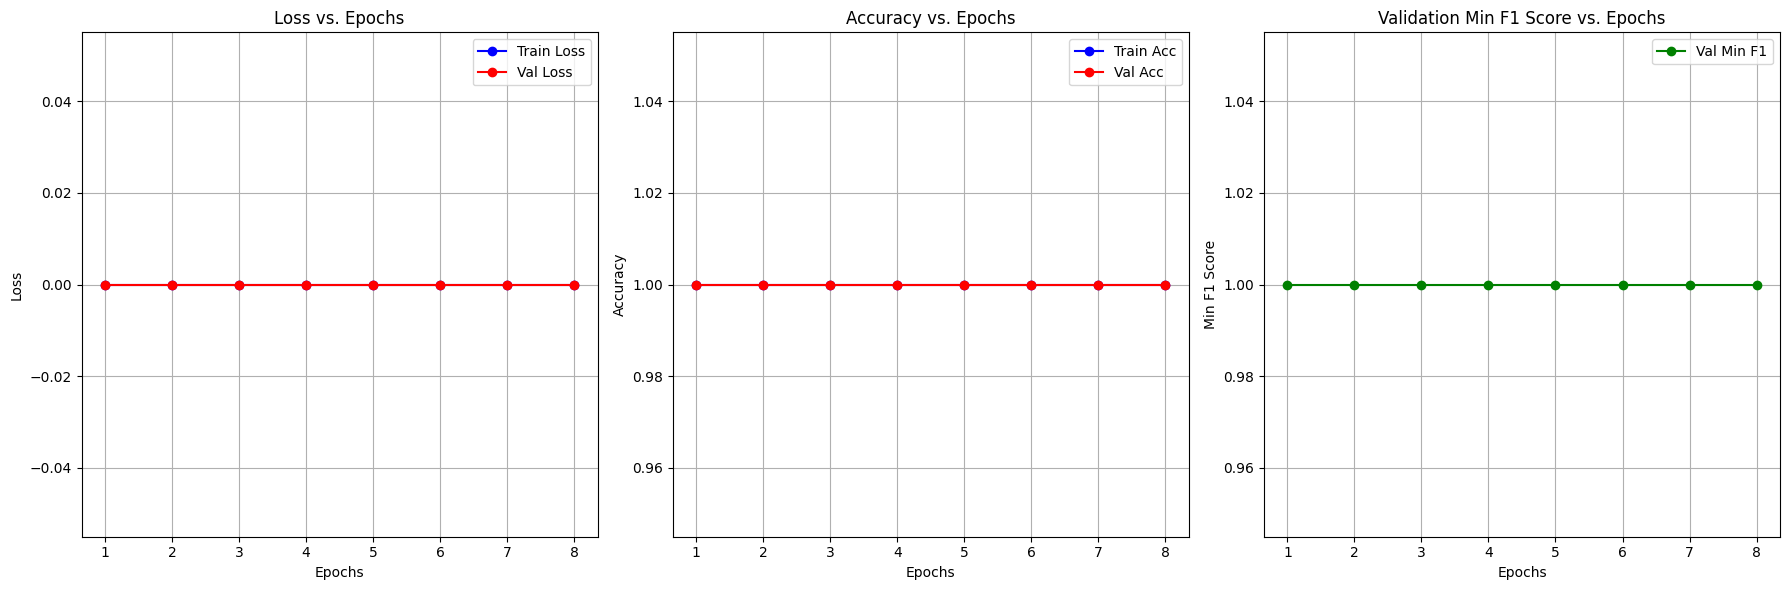


Best Validation Minimum F1 (1.0000) occurred at epoch 1
F1 Scores per class at the best epoch:
	1: 1.0000


In [10]:
# Plotting Training History (with fix for GPU tensors)
import matplotlib.pyplot as plt # Should be already imported
import numpy as np             # Should be already imported
import torch                   # Should be already imported

if 'training_history' not in globals() or not training_history['train_loss']: # Check if training actually ran
    print("No training history found. Please run the training loop (Cell 2) first.")
else:
    print("\n--- Plotting Training History ---")

    # Helper function to convert list of items (potentially tensors) to CPU numpy arrays or scalars
    def prepare_for_plotting(data_list):
        processed_list = []
        for item in data_list:
            if isinstance(item, torch.Tensor):
                if item.is_cuda: # Check if it's on GPU
                    item_cpu = item.cpu()
                else:
                    item_cpu = item
                # If it's a scalar tensor, convert to Python number, else to numpy
                processed_list.append(item_cpu.item() if item_cpu.numel() == 1 else item_cpu.numpy())
            else: # Assuming it's already a Python number or numpy array
                processed_list.append(item)
        return processed_list

    epochs_ran = range(1, len(training_history['train_loss']) + 1)

    # Prepare data for plotting
    plot_train_loss = prepare_for_plotting(training_history['train_loss'])
    plot_val_loss = prepare_for_plotting(training_history['val_loss'])
    plot_train_acc = prepare_for_plotting(training_history['train_acc'])
    plot_val_acc = prepare_for_plotting(training_history['val_acc'])
    plot_val_min_f1 = prepare_for_plotting(training_history['val_min_f1'])
    # val_f1_per_class might contain lists of numbers, usually doesn't need this conversion unless they are tensors
    # For safety, if you were to plot individual F1s from val_f1_per_class, apply prepare_for_plotting to those too.

    plt.figure(figsize=(18, 6))

    # Plot Loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs_ran, plot_train_loss, 'bo-', label='Train Loss')
    plt.plot(epochs_ran, plot_val_loss, 'ro-', label='Val Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs_ran, plot_train_acc, 'bo-', label='Train Acc')
    plt.plot(epochs_ran, plot_val_acc, 'ro-', label='Val Acc')
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Validation Minimum F1 Score
    plt.subplot(1, 3, 3)
    if plot_val_min_f1: # Check if list is not empty after processing
        plt.plot(epochs_ran, plot_val_min_f1, 'go-', label='Val Min F1')
        plt.title('Validation Min F1 Score vs. Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Min F1 Score')
        plt.legend()
        plt.grid(True)
    else:
        plt.text(0.5, 0.5, 'No Val Min F1 data to plot', ha='center', va='center', transform=plt.gca().transAxes)


    plt.tight_layout()
    plt.show()

    # --- Output F1 scores from the best epoch ---
    if training_history['val_min_f1']: # Check if there's F1 history
        # Find the index of the best epoch based on val_min_f1
        # Ensure val_min_f1 is a list of numbers first for np.argmax
        numeric_val_min_f1 = prepare_for_plotting(training_history['val_min_f1'])
        if numeric_val_min_f1: # If not empty after processing
            best_epoch_idx = np.argmax(numeric_val_min_f1)
            actual_best_min_f1_score = numeric_val_min_f1[best_epoch_idx] # Get the actual score

            print(f"\nBest Validation Minimum F1 ({actual_best_min_f1_score:.4f}) occurred at epoch {best_epoch_idx + 1}")

            if best_epoch_idx < len(training_history['val_f1_per_class']):
                best_f1_scores_per_class = training_history['val_f1_per_class'][best_epoch_idx]
                # Ensure best_f1_scores_per_class are numbers if they were tensors
                best_f1_scores_per_class_numeric = prepare_for_plotting(best_f1_scores_per_class)

                print("F1 Scores per class at the best epoch:")
                if 'current_class_names' in globals() and current_class_names:
                    for i, class_name in enumerate(current_class_names):
                        score = best_f1_scores_per_class_numeric[i] if i < len(best_f1_scores_per_class_numeric) else 0.0
                        print(f"\t{class_name}: {score:.4f}")
                else:
                    print("current_class_names not defined, cannot print per-class F1 scores with names.")
            else:
                print("Could not retrieve F1 scores per class for the best epoch (index out of bounds).")
        else:
            print("Validation minimum F1 history is empty after processing.")
    else:
        print("No validation minimum F1 score history to analyze for best epoch.")

In [11]:
# Verify Test DataFrame (Run if you are unsure or restarting)
import pandas as pd
import os

# This assumes 'test_ids_df' was created in Step 3 and has 'image_id' and 'filepath' columns
if 'test_ids_df' not in globals() or test_ids_df is None:
    print("test_ids_df not found. Attempting to recreate it...")
    base_dir = '/kaggle/input/soil-classification-part-2/soil_competition-2025' # Make sure this is correct
    test_dir = os.path.join(base_dir, 'test/')
    test_ids_csv_path = os.path.join(base_dir, 'test_ids.csv')
    try:
        test_ids_df = pd.read_csv(test_ids_csv_path)
        test_ids_df['filepath'] = test_ids_df['image_id'].apply(lambda x: os.path.join(test_dir, x))
        print("test_ids_df (re)created successfully with filepaths.")
        print(test_ids_df.head())
    except FileNotFoundError:
        print(f"Error: {test_ids_csv_path} not found. Please ensure it exists.")
        test_ids_df = None
    except KeyError as e:
        print(f"Error: 'image_id' column not found in {test_ids_csv_path}. Error: {e}")
        test_ids_df = None
else:
    print("test_ids_df already exists.")
    if 'filepath' not in test_ids_df.columns:
        print("Warning: 'filepath' column missing in test_ids_df. Attempting to add it.")
        if 'test_dir' not in globals(): # Define test_dir if not already defined
            base_dir = '/content/soil_classification-2025/'
            test_dir = os.path.join(base_dir, 'test/')
        test_ids_df['filepath'] = test_ids_df['image_id'].apply(lambda x: os.path.join(test_dir, x))
        print("Added 'filepath' column to test_ids_df.")
    print(test_ids_df.head())

test_ids_df already exists.
                               image_id  \
0  6595f1266325552489c7d1635fafb88f.jpg   
1  4b614841803d5448b59e2c6ca74ea664.jpg   
2  ca30e008692a50638b43d944f46245c8.jpg   
3  6a9046a219425f7599729be627df1c1a.jpg   
4  97c1e0276d2d5c2f88dddbc87357611e.jpg   

                                            filepath  
0  /kaggle/input/soil-classification-part-2/soil_...  
1  /kaggle/input/soil-classification-part-2/soil_...  
2  /kaggle/input/soil-classification-part-2/soil_...  
3  /kaggle/input/soil-classification-part-2/soil_...  
4  /kaggle/input/soil-classification-part-2/soil_...  


In [12]:
# Prepare Test DataLoader
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
# torchvision.transforms should already be imported, and val_transforms defined

if 'test_ids_df' not in globals() or test_ids_df is None:
    print("Error: test_ids_df is not defined. Please run the cell above to create/verify it.")
elif 'val_transforms' not in globals() or val_transforms is None:
    print("Error: val_transforms is not defined. Please ensure Step 5 (PyTorch version) ran successfully.")
else:
    print("\n--- Preparing Test Data ---")

    # Custom PyTorch Dataset for Test Data
    # This version will return the image and its image_id
    class TestSoilDataset(Dataset):
        def __init__(self, dataframe, transform=None):
            self.dataframe = dataframe
            self.transform = transform

        def __len__(self):
            return len(self.dataframe)

        def __getitem__(self, idx):
            img_path = self.dataframe.iloc[idx]['filepath']
            image_id = self.dataframe.iloc[idx]['image_id'] # Get the image_id
            try:
                image = Image.open(img_path).convert('RGB') # Ensure image is RGB
            except FileNotFoundError:
                print(f"ERROR: Test image not found at {img_path}. Returning None.")
                return None, image_id # Return None for image if not found
            except Exception as e:
                print(f"ERROR: Could not read test image at {img_path}. Error: {e}. Returning None.")
                return None, image_id

            if self.transform:
                image = self.transform(image)

            return image, image_id # Return transformed image and its id

    # Create Test Dataset instance
    print("Creating Test Dataset instance...")
    try:
        # Ensure 'filepath' and 'image_id' columns exist
        if 'filepath' not in test_ids_df.columns or 'image_id' not in test_ids_df.columns:
             raise KeyError("test_ids_df must contain 'filepath' and 'image_id' columns.")

        test_dataset = TestSoilDataset(test_ids_df, transform=val_transforms) # Use validation transforms
        print(f"Test dataset created successfully. Size: {len(test_dataset)}")
    except Exception as e:
        print(f"Error creating Test Dataset: {e}")
        test_dataset = None

    # Create Test DataLoader instance
    if test_dataset:
        print("\nCreating Test DataLoader instance...")
        # BATCH_SIZE should be defined from previous steps, e.g., 32
        # No need to shuffle test data
        test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
        print("Test DataLoader created successfully.")

        # --- Verify a batch from the test_loader (Optional) ---
        print("\nVerifying a sample batch from the test_loader:")
        try:
            sample_batch_test_images, sample_batch_test_ids = next(iter(test_loader))

            # Handle potential None images if TestSoilDataset returns them
            if sample_batch_test_images is not None and sample_batch_test_images.nelement() > 0:
                print(f"Sample batch test images shape: {sample_batch_test_images.shape}")
                print(f"Sample batch test IDs (first 5): {sample_batch_test_ids[:5]}")

                # Display the first image from the batch (optional)
                # img_to_show = sample_batch_test_images[0].permute(1, 2, 0).cpu().numpy()
                # mean = np.array(imagenet_mean) # imagenet_mean should be defined
                # std = np.array(imagenet_std)   # imagenet_std should be defined
                # img_to_show = std * img_to_show + mean
                # img_to_show = np.clip(img_to_show, 0, 1)
                # plt.figure(figsize=(3,3))
                # plt.imshow(img_to_show)
                # plt.title(f"Sample test image\nID: {sample_batch_test_ids[0]}")
                # plt.axis('off')
                # plt.show()
            elif sample_batch_test_images is None:
                 print("The first item from the batch was None (likely an image loading error).")
            else:
                print("Retrieved test batch is empty or contains no valid images.")

        except StopIteration:
            print("The Test DataLoader is empty. This might happen if the test_dataset itself is empty.")
        except Exception as e:
            print(f"Error verifying sample batch from test_loader: {e}")
            import traceback
            traceback.print_exc()
    else:
        print("Test DataLoader not created due to issues with Test Dataset.")


--- Preparing Test Data ---
Creating Test Dataset instance...
Test dataset created successfully. Size: 967

Creating Test DataLoader instance...
Test DataLoader created successfully.

Verifying a sample batch from the test_loader:
Sample batch test images shape: torch.Size([32, 3, 224, 224])
Sample batch test IDs (first 5): ['6595f1266325552489c7d1635fafb88f.jpg', '4b614841803d5448b59e2c6ca74ea664.jpg', 'ca30e008692a50638b43d944f46245c8.jpg', '6a9046a219425f7599729be627df1c1a.jpg', '97c1e0276d2d5c2f88dddbc87357611e.jpg']


In [13]:
# Cell: Generate Predictions on Test Set (Loading Best Model Explicitly)

import torch
import torch.nn as nn # For model definition
import torchvision.models as models # For model definition
import pandas as pd # For submission_df

# --- Ensure necessary variables are defined ---
if 'test_loader' not in globals() or test_loader is None:
    print("Error: 'test_loader' is not defined. Please run the 'Prepare Test Data' cell first.")
    # Potentially exit or raise error
elif 'idx_to_label' not in globals() or idx_to_label is None:
    print("Error: 'idx_to_label' mapping is not defined. Please ensure data preparation (Step 5 PyTorch) was run.")
    # Potentially exit or raise error
elif 'num_classes' not in globals(): # num_classes was defined from label_to_idx
    print("Error: 'num_classes' not defined. Ensure previous steps (like label mapping) ran.")
    # Potentially exit or raise error
else:
    print("\n--- Generating Predictions on Test Set (Loading Best Model Explicitly) ---")

    # --- Define Device ---
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # --- Initialize Model Architecture (same as in Step 6) ---
    print("Initializing model architecture (ResNet50)...")
    # Make sure to use the same weights version if specified before, e.g., IMAGENET1K_V2
    # If you used default weights, then models.resnet50(weights=True) or models.resnet50(pretrained=True) for older torchvision
    # For consistency with potential previous definition:
    try:
        loaded_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    except AttributeError: # Fallback for older torchvision that might not have ResNet50_Weights enum
        print("ResNet50_Weights.IMAGENET1K_V2 not found, trying default pretrained weights.")
        loaded_model = models.resnet50(pretrained=True) # 'pretrained=True' is deprecated but works for older versions


    num_ftrs = loaded_model.fc.in_features
    loaded_model.fc = nn.Linear(num_ftrs, num_classes) # num_classes should be defined
    print(f"Model fc layer replaced for {num_classes} classes.")

    # --- Load the Best Saved Weights ---
    MODEL_SAVE_PATH = 'best_soil_model_resnet50_frozen.pth' # Ensure this matches the save path from training
    print(f"Loading best model weights from: {MODEL_SAVE_PATH}")
    try:
        loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
        print("Best model weights loaded successfully.")
    except FileNotFoundError:
        print(f"Error: Model weights file not found at {MODEL_SAVE_PATH}.")
        print("Please ensure the training completed and the model was saved, or check the path.")
        loaded_model = None # Set to None if weights can't be loaded
    except Exception as e:
        print(f"An error occurred while loading model weights: {e}")
        loaded_model = None


    if loaded_model:
        loaded_model.to(device) # Move model to the device
        loaded_model.eval()     # Set the model to evaluation mode

        all_test_preds = []
        all_test_image_ids = []

        print("\nStarting prediction loop...")
        with torch.no_grad():  # Disable gradient calculations for inference
            for batch_idx, (inputs, image_ids) in enumerate(test_loader):
                if inputs is None:
                    print(f"Skipping batch {batch_idx} due to image loading errors (inputs is None).")
                    continue
                if inputs.nelement() == 0 or inputs.shape[0] == 0 :
                    print(f"Skipping empty batch {batch_idx}.")
                    continue

                inputs = inputs.to(device)
                outputs = loaded_model(inputs)
                _, preds_tensor = torch.max(outputs, 1)

                all_test_preds.extend(preds_tensor.cpu().numpy())
                all_test_image_ids.extend(image_ids)

                if (batch_idx + 1) % 5 == 0 or (batch_idx + 1) == len(test_loader):
                     print(f"Processed batch {batch_idx + 1}/{len(test_loader)}")

        # Convert predicted indices to string labels
        predicted_soil_types = [idx_to_label[idx] for idx in all_test_preds]

        print("\nPredictions generated.")
        print(f"Total predictions: {len(predicted_soil_types)}")
        print(f"Total image IDs processed: {len(all_test_image_ids)}")

        # Display a few sample predictions
        print("\nSample predictions (first 10):")
        for i in range(min(10, len(all_test_image_ids))):
            print(f"Image ID: {all_test_image_ids[i]}, Predicted Soil Type: {predicted_soil_types[i]}")

        # Create a DataFrame for submission
        submission_df = pd.DataFrame({
            'image_id': all_test_image_ids,
            'soil_type': predicted_soil_types
        })
        print("\nFirst 5 rows of submission DataFrame:")
        print(submission_df.head())
    else:
        print("Predictions cannot be generated as model loading failed.")


--- Generating Predictions on Test Set (Loading Best Model Explicitly) ---
Using device: cuda
Initializing model architecture (ResNet50)...
Model fc layer replaced for 1 classes.
Loading best model weights from: best_soil_model_resnet50_frozen.pth
Best model weights loaded successfully.

Starting prediction loop...
Processed batch 5/31
Processed batch 10/31
Processed batch 15/31
Processed batch 20/31
Processed batch 25/31
Processed batch 30/31
Processed batch 31/31

Predictions generated.
Total predictions: 967
Total image IDs processed: 967

Sample predictions (first 10):
Image ID: 6595f1266325552489c7d1635fafb88f.jpg, Predicted Soil Type: 1
Image ID: 4b614841803d5448b59e2c6ca74ea664.jpg, Predicted Soil Type: 1
Image ID: ca30e008692a50638b43d944f46245c8.jpg, Predicted Soil Type: 1
Image ID: 6a9046a219425f7599729be627df1c1a.jpg, Predicted Soil Type: 1
Image ID: 97c1e0276d2d5c2f88dddbc87357611e.jpg, Predicted Soil Type: 1
Image ID: e432d7988d125c8497d41b7ff223b187.jpg, Predicted Soil T

In [14]:
# Create Submission CSV File

if 'submission_df' in globals() and submission_df is not None:
    print("\n--- Creating Submission CSV File ---")
    submission_file_name = 'final_test_submission.csv'
    try:
        submission_df.to_csv(submission_file_name, index=False)
        print(f"Submission file '{submission_file_name}' created successfully.")
        print(f"Path: {os.path.abspath(submission_file_name)}")

        # Optional: Display the first few lines of the created CSV to verify
        print("\nFirst 5 lines of the submission file:")
        with open(submission_file_name, 'r') as f:
            for i in range(5):
                line = f.readline().strip()
                if not line:
                    break
                print(line)

    except Exception as e:
        print(f"Error creating submission file: {e}")
else:
    print("Error: 'submission_df' not found. Please generate predictions first.")


--- Creating Submission CSV File ---
Submission file 'final_test_submission.csv' created successfully.
Path: /kaggle/working/final_test_submission.csv

First 5 lines of the submission file:
image_id,soil_type
6595f1266325552489c7d1635fafb88f.jpg,1
4b614841803d5448b59e2c6ca74ea664.jpg,1
ca30e008692a50638b43d944f46245c8.jpg,1
6a9046a219425f7599729be627df1c1a.jpg,1
